Linear regression 을 학습하며, 기계학습의 원리 및 TensorFlow 를 익히는 notebook 입니다.


**라이브러리 Import 하기**

In [ ]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

**X and Y data (given)**

In [ ]:
x_train = [1, 2, 3, 4, 5]
#y_train = [2, 4, 6, 8, 10]
y_train = [3, 5, 7, 9, 11] #y = 2x +1, w=2, b=1이 나와야 함

signal_length = len(x_train)
y_noise = np.random.normal(0, 1, signal_length)

y_train = y_train + y_noise
# 다음의 것들도 해보시오
#y_train = [2, 4, 6] # 그냥 x_train 에 2배 곱해서 생성
#y_train = [3, 5, 7]

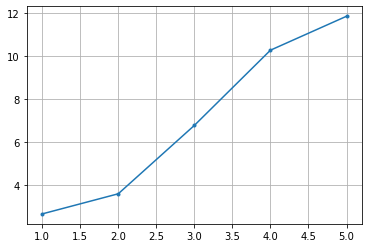

In [ ]:
plt.plot(x_train, y_train,'.-')
plt.grid()

**Initialization**

In [ ]:
useRandom = False

In [ ]:
if useRandom:
    W = tf.Variable(tf.random_normal([1]), name='weight')
    b = tf.Variable(tf.random_normal([1]), name='bias')
else:
    w0 = 7.0;
    b0 = 5.0;

    W = tf.Variable(w0*tf.ones([1]), name='weight')
    b = tf.Variable(b0*tf.ones([1]), name='bias')

**Our hypothesis**

$$ H(x)=Wx + b $$

In [ ]:
hypothesis = x_train * W + b

**cost/loss function 정의하기**

*   loss of one training example :


$$loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2$$

In [ ]:
loss = tf.reduce_mean(tf.square(hypothesis - y_train))

**Optimizer**

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

**Launch the graph in a session**

In [ ]:
sess = tf.Session() #세션을 염

**Initializes global variables in the graph.**

In [ ]:
sess.run(tf.global_variables_initializer())

In [ ]:
nb_epoch = 1001
vloss = [] #empty list
vb = [] #empty list
vw = [] #empty list
for step in range(nb_epoch):
    sess.run(train)
    loss1 = sess.run(loss)
    vloss.append(loss1)
    
    if step % 50 == 0: # 5번마다
        w1 = sess.run(W)[0] # 기울기
        b1 = sess.run(b)[0] # bias
        
        print(step,'\t', loss1, '\t', w1, '\t',b1)

0 	 234.81104 	 5.6820817 	 4.6205444
50 	 2.4049878 	 1.5885085 	 2.8248546
100 	 1.8246971 	 1.732237 	 2.3059266
150 	 1.4111133 	 1.8535813 	 1.8678349
200 	 1.1163442 	 1.9560235 	 1.4979863
250 	 0.9062564 	 2.042508 	 1.1857499
300 	 0.7565233 	 2.1155202 	 0.9221518
350 	 0.6498059 	 2.1771593 	 0.6996154
400 	 0.5737464 	 2.2291968 	 0.51174426
450 	 0.5195373 	 2.273128 	 0.35313857
500 	 0.48090163 	 2.310216 	 0.21923946
550 	 0.45336518 	 2.3415265 	 0.10619796
600 	 0.43373948 	 2.3679595 	 0.010765839
650 	 0.41975194 	 2.3902755 	 -0.06980058
700 	 0.40978274 	 2.409115 	 -0.13781713
750 	 0.40267748 	 2.4250195 	 -0.19523838
800 	 0.39761338 	 2.4384468 	 -0.24371491
850 	 0.39400423 	 2.449782 	 -0.2846398
900 	 0.39143187 	 2.459352 	 -0.31918997
950 	 0.38959846 	 2.467431 	 -0.34835795
1000 	 0.38829178 	 2.474252 	 -0.3729825


Text(0, 0.5, 'loss')

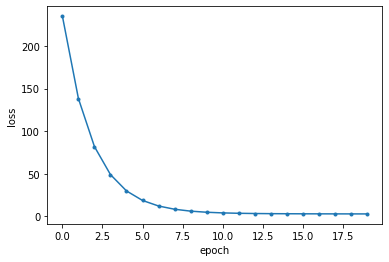

In [ ]:
plt.plot(vloss[:20],'.-')
plt.xlabel('epoch')
plt.ylabel('loss')

TODO: w, b의 epoch 에 따른 변화 그래프 넣기 !

**학습완료**

In [ ]:
w1 = sess.run(W)[0] # 기울기
b1 = sess.run(b)[0] # bias

출력해보기

In [ ]:
print(w1, b1)

2.474252 -0.3729825


In [ ]:
str1 = 'y = ' + str(w1) +'x + ' + str(b1)
print(str1)

y = 2.474252x + -0.3729825


Text(0.5, 1.0, 'y = 2.474252x + -0.3729825')

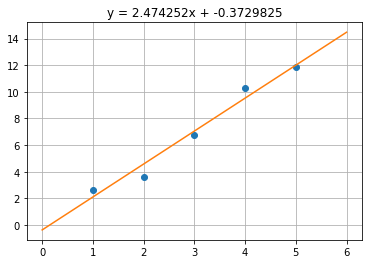

In [ ]:
plt.figure(figsize=(6,4)) # figsize를 바꾸어보세요
plt.plot(x_train, y_train,'o') #train data 그리기

# 직선 그래프를 그리기 위한 코드
# 그래프의 x좌표를 일정 간격으로 설정함
x1 = np.linspace(np.min(x_train)-1, np.max(x_train)+1)
y1 = w1*x1 + b1
plt.plot(x1, y1)

plt.grid() # 격자
#plt.axis((np.min(x_train) - 1, np.max(x_train) + 1, np.min(y_train) - 1, np.max(y_train) + 1))
plt.title(str1)

##스스로 해보기
아래 부분을 수정해서 처음부터 다시 진행해보기 바랍니다.

* 예1) 노이즈를 다르게 준다
<br> x_train = [1, 2, 3]
<br> y_train = [2+0.1, 4-0.3, 6+0.15] # 약간의 noise 추가
* 예2) 데이터의 갯수를 지금은 세 개의 점으로 했으나 더 늘려서도 해본다.
* 예3) 데이터의 모델을 현재는 y=2x+0 으로 해서 만들었으나, 바꾸어본다.
<br> y=3x-5 
<br> y=1.2x + 3
* 예4) 초기값인 w0, b0를 다르게 설정해본다.
<br> w0 = 7.0;
<br> b0 = 5.0;


In [ ]:
x_train = [1, 2, 3, 4, 5]
y_train = [3, 5, 7, 9, 11] #y = 2x +1

signal_length = len(x_train)
y_noise = np.random.normal(0, 1, signal_length)

y_train = y_train + y_noise

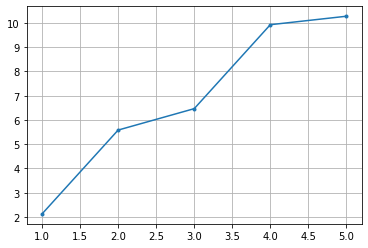

In [ ]:
plt.plot(x_train, y_train,'.-')
plt.grid()

In [ ]:
useRandom = False

In [ ]:
if useRandom:
    W = tf.Variable(tf.random_normal([1]), name='weight')
    b = tf.Variable(tf.random_normal([1]), name='bias')
else:
    w0 = 10.0;
    b0 = 3.0;

    W = tf.Variable(w0*tf.ones([1]), name='weight')
    b = tf.Variable(b0*tf.ones([1]), name='bias')

In [ ]:
hypothesis = x_train * W + b

In [ ]:
loss = tf.reduce_mean(tf.square(hypothesis - y_train))

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

In [ ]:
sess = tf.Session()

In [ ]:
sess.run(tf.global_variables_initializer())

In [ ]:
nb_epoch = 3001
vloss = [] #empty list
vb = [] #empty list
vw = [] #empty list
for step in range(nb_epoch):
    sess.run(train)
    loss1 = sess.run(loss)
    vloss.append(loss1)
    
    if step % 50 == 0: # 5번마다
        w1 = sess.run(W)[0] # 기울기
        b1 = sess.run(b)[0] # bias
        
        print(step,'\t', loss1, '\t', w1, '\t',b1)

0 	 471.656 	 8.115094 	 2.477501
50 	 0.53266096 	 2.0385191 	 0.7755445
100 	 0.5321906 	 2.0426028 	 0.7607685
150 	 0.53185546 	 2.0460575 	 0.74829626
200 	 0.53161645 	 2.048974 	 0.73776656
250 	 0.5314462 	 2.0514362 	 0.72887725
300 	 0.53132474 	 2.0535147 	 0.72137254
350 	 0.5312382 	 2.0552697 	 0.7150371
400 	 0.5311767 	 2.0567513 	 0.70968825
450 	 0.5311329 	 2.058002 	 0.7051727
500 	 0.53110135 	 2.0590577 	 0.7013607
550 	 0.5310791 	 2.0599492 	 0.6981424
600 	 0.5310632 	 2.0607016 	 0.69542545
650 	 0.53105175 	 2.061337 	 0.69313186
700 	 0.5310438 	 2.0618732 	 0.6911957
750 	 0.5310381 	 2.062326 	 0.6895612
800 	 0.5310338 	 2.0627084 	 0.6881813
850 	 0.53103083 	 2.0630307 	 0.6870164
900 	 0.53102887 	 2.0633032 	 0.68603283
950 	 0.53102756 	 2.0635333 	 0.68520266
1000 	 0.5310264 	 2.0637271 	 0.68450177
1050 	 0.5310256 	 2.0638914 	 0.6839101
1100 	 0.53102505 	 2.0640297 	 0.6834105
1150 	 0.53102463 	 2.0641463 	 0.6829887
1200 	 0.53102434 	 2.0642

Text(0, 0.5, 'loss')

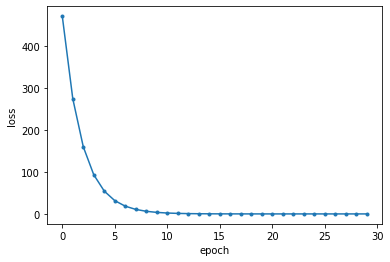

In [ ]:
plt.plot(vloss[:30],'.-')
plt.xlabel('epoch')
plt.ylabel('loss')

In [ ]:
w1 = sess.run(W)[0] # 기울기
b1 = sess.run(b)[0] # bias

In [ ]:
print(w1, b1)

2.0647752 0.6807174


In [ ]:
str1 = 'y = ' + str(w1) +'x + ' + str(b1)
print(str1)

y = 2.0647752x + 0.6807174


Text(0.5, 1.0, 'y = 2.0647752x + 0.6807174')

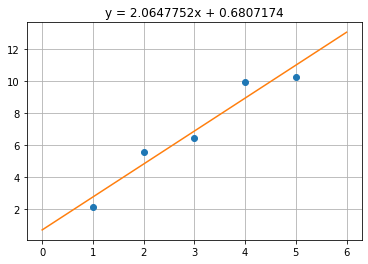

In [ ]:
plt.figure(figsize=(6,4)) # figsize를 바꾸어보세요
plt.plot(x_train, y_train,'o') #train data 그리기

# 직선 그래프를 그리기 위한 코드
# 그래프의 x좌표를 일정 간격으로 설정함
x1 = np.linspace(np.min(x_train)-1, np.max(x_train)+1)
y1 = w1*x1 + b1
plt.plot(x1, y1)

plt.grid() # 격자
#plt.axis((np.min(x_train) - 1, np.max(x_train) + 1, np.min(y_train) - 1, np.max(y_train) + 1))
plt.title(str1)

## R-Squared

R-Squared란? 모델이 데이터에 얼마나 적합한 지 수치적으로 결정하는 방법입니다.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import random
%matplotlib inline

### MSE (Mean Squared Error)

In [ ]:
x=[[1],[2],[3],[4],[5]]
y=[[1],[5],[6],[7],[11]]
y=np.array(y)
x=np.array(x)
mean=(1+5+6+7+11)/5 #데이터의 평균값
print(y)

[[ 1]
 [ 5]
 [ 6]
 [ 7]
 [11]]


Text(0, 0.5, 'Y')

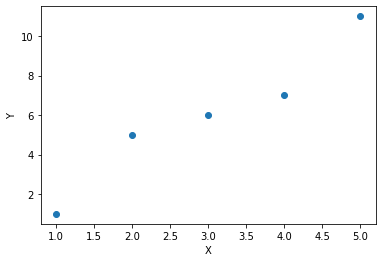

In [ ]:
plt.plot(x, y, marker='o',linestyle='')
plt.xlabel('X')
plt.ylabel('Y')

In [ ]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

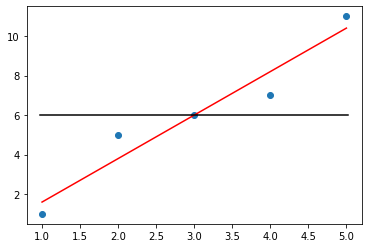

In [ ]:
plt.plot(x, y, marker='o',linestyle='')
plt.plot(x,lr.predict(x),color = 'red')
plt.axhline(y=mean, xmin=0.04, xmax=0.96, color = 'black')

In [ ]:
mean_squared_error(y, lr.predict(x))

0.7200000000000001

In [ ]:
print(lr.predict(x))

[[ 1.6]
 [ 3.8]
 [ 6. ]
 [ 8.2]
 [10.4]]


In [ ]:

def myMSE(X, Y, line): 
    err=0
    #for i in range(len(X)):        #예측값 MSE 구하기
    #        err +=(Y[i][0]-line[i][0])**2 
    
    if (str(type(line)) == "<class 'float'>"): #평균 MSE 구하기
        for i in range(len(X)):
            err += (Y[i][0]-line)**2
        
    else:
        for i in range(len(X)):        #예측값 MSE 구하기
             err +=(Y[i][0]-line[i][0])**2 
    
    
    MSE = err/len(X) 
    return MSE

In [ ]:
print("MSE : ", myMSE(x,y,lr.predict(x)))

MSE :  0.7200000000000001


### R squared

In [ ]:
lr.score(x, y)

0.9307692307692308

In [ ]:
def myRsq(X,Y,model):
    
    #평균구하기
    hap = 0
    for i in range(len(X)):
        hap += Y[i][0]
    mean = float(hap/len(X))
    print("평균 : ", mean)
    
    #모델fit하기
    model.fit(X,Y)
    
    #MSE와 R-squared구하기
    reg_mse=myMSE(X,Y,model.predict(X))
    avg_mse=myMSE(X,Y,mean)
    r=1-(reg_mse/avg_mse)
    
    #출력
    #print("MSE of regression line : ",reg_mse)
    #print("MSE of average line : ", avg_mse)
    print("R-squared : ", r)

In [ ]:
myRsq(x,y,LinearRegression())

평균 :  6.0
R-squared :  0.9307692307692308


### 100개 데이터로 해보기
### 데이터가 선형모델에 적합한 경우

#### 1. 데이터 만들기

In [ ]:
data=100 #데이터 개수 정하기

In [ ]:
#x_train 데이터 만들기
x_train=[]
for i in range(1,data+1):
    x_train.append([i])
    
x_train=np.array(x_train)
x_train.shape

(100, 1)

In [ ]:
#y_train 데이터 만들기
y_train1=[]
for i in range(1,data+1): #y_train에 노이즈를 만들어서 넣기
    y_train1.append([i+random.uniform(-20, 20)])#난수발생시켜서 노이즈 만들기

y_train1=np.array(y_train1)
y_train1.shape

(100, 1)

Text(0, 0.5, 'Y')

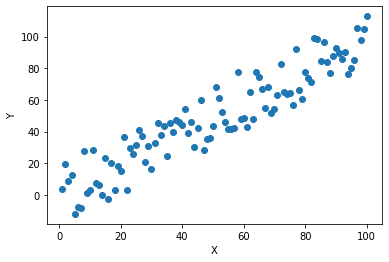

In [ ]:
plt.plot(x_train, y_train1, marker='o',linestyle='')
plt.xlabel('X')
plt.ylabel('Y')

#### 2. 모델에 넣기

In [ ]:
lr.fit(x_train,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#평균값 구하기
mean=0
for i in y_train1:
    for j in i:
        mean+=j
mean= mean/data
print(mean)

48.76503970769388


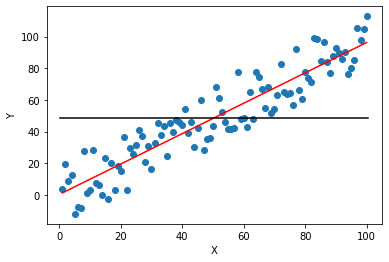

In [ ]:
#예측한 값과 평균 그려보기
plt.plot(x_train, y_train1,marker='o',linestyle='')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x_train,lr.predict(x_train),color = 'red')
plt.axhline(y=mean, xmin=0.04, xmax=0.96, color = 'black')

함수와 내가 만든 함수 비교하기

In [ ]:
lr.score(x_train,y_train1)

0.8627277897868014

In [ ]:
myRsq(x_train, y_train1, LinearRegression())

평균 :  48.76503970769388
R-squared :  0.8627277897868013


### 데이터가 선형모델에 부적합한 경우

In [ ]:
y_train2=[]
for i in range(1,data+1): #y_train에 노이즈를 만들어서 넣기
    y_train2.append([i+random.uniform(-400, 400)])#난수발생시켜서 노이즈 만들기

y_train2=np.array(y_train2)
y_train2.shape

(100, 1)

Text(0, 0.5, 'Y')

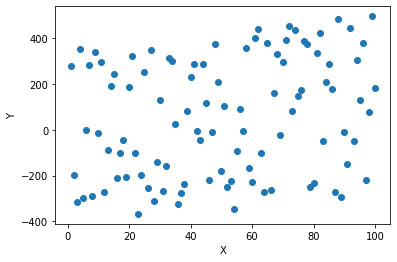

In [ ]:
plt.plot(x_train, y_train2, marker='o',linestyle='')
plt.xlabel('X')
plt.ylabel('Y')

In [ ]:
mean=0
for i in y_train2:
    for j in i:
        mean+=j
mean= mean/data
print(mean)

57.91303712329747


In [ ]:
lr.fit(x_train,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

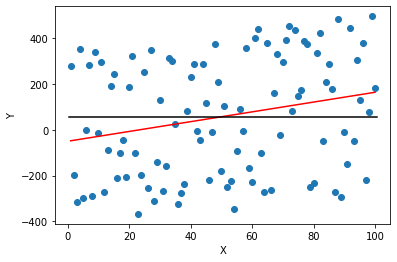

In [ ]:
plt.plot(x_train, y_train2,marker='o',linestyle='')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x_train,lr.predict(x_train),color = 'red')
plt.axhline(y=mean, xmin=0.04, xmax=0.96, color = 'black')

In [ ]:
lr.score(x_train,y_train2)

0.058732945379173285

In [ ]:
myRsq(x_train, y_train2, LinearRegression())

평균 :  57.91303712329747
R-squared :  0.05873294537917273
